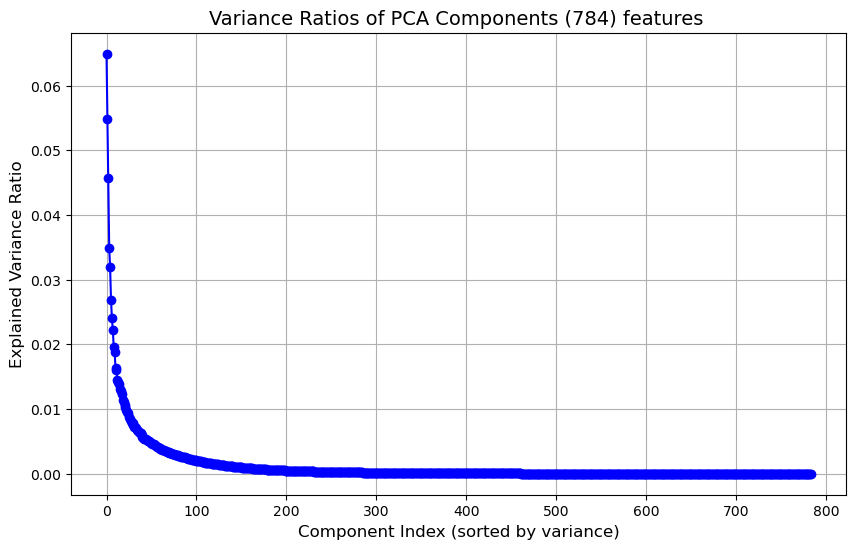

In [18]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
with open('mnist_train.pkl', 'rb') as file:
    mnist_train = pickle.load(file)
train_images, train_labels = mnist_train
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
train_images_flat = train_images[:1000].reshape((1000,-1))

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
pca = PCA(n_components=784)
pca.fit(train_images_scaled)

explained_variance_ratios = pca.explained_variance_ratio_

sorted_variance_ratios = np.sort(explained_variance_ratios)[::-1]

#plot the figure
plt.figure(figsize=[10,6])
plt.plot(sorted_variance_ratios, marker='o', linestyle='-', color='b')
plt.title('Variance Ratios of PCA Components (784) features ', fontsize=14)
plt.xlabel('Component Index (sorted by variance)', fontsize = 12)
plt.ylabel('Explained Variance Ratio', fontsize = 12)
plt.grid(True)
plt.show()

In [12]:
# part 2



(1000, 784)


In [13]:
print(X_r)


[[-0.51199046  2.9647372 ]
 [ 8.20134823  7.12328261]
 [ 3.11315639 -7.93545718]
 ...
 [ 3.71950854 12.07243872]
 [ 2.73705342 -0.95965369]
 [-3.71638352  5.43218951]]
